**Research Questions**

1. 

2. 

3. 

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [43]:
X = pd.read_csv("data/train/features.csv")
Y = pd.read_csv("data/train/labels.csv")

In [44]:
df = pd.concat([X,Y], axis=1)
df['basin']

0                     Lake Nyasa
1                  Lake Victoria
2                        Pangani
3        Ruvuma / Southern Coast
4                  Lake Victoria
                  ...           
59395                    Pangani
59396                     Rufiji
59397                     Rufiji
59398                     Rufiji
59399                Wami / Ruvu
Name: basin, Length: 59400, dtype: object

Nominal: funder, wpt_name, basin, subvillage, region, region_code, district_code, lga, ward, recorded_by, scheme_management, scheme_name, extraction_type, extraction_type_group, extraction_type_class, management, management_group, payment, payment_type, water_quality, quality_group, quantity, quantity_group, source, source_type, source_class, waterpoint_type, waterpoint_type_group.

Ordinal: None.

Interval: date_recorded, construction_year.

Ratio: amount_tsh, gps_height, longitude, latitude, num_private, population.

In [3]:
import pandas as pd

# Create the table as a list of lists
table = [
    ['Feature', 'Value'],
    ['amount_tsh', 'Ratio'],
    ['date_recorded', 'Interval'],
    ['funder', 'Nominal'],
    ['gps_height', 'Interval'],
    ['installer', 'Nominal'],
    ['longitude', 'Interval'],
    ['latitude', 'Interval'],
    ['wpt_name', 'Nominal'],
    ['basin', 'Nominal'],
    ['subvillage', 'Nominal'],
    ['region', 'Nominal'],
    ['region_code', 'Nominal'],
    ['district_code', 'Nominal'],
    ['lga', 'Nominal'],
    ['ward', 'Nominal'],
    ['population', 'Ratio'],
    ['public_meeting', 'Nominal'],
    ['recorded_by', 'Nominal'],
    ['scheme_management', 'Nominal'],
    ['scheme_name', 'Nominal'],
    ['permit', 'Nominal'],
    ['construction_year', 'Interval'],
    ['extraction_type', 'Nominal'],
    ['extraction_type_group', 'Nominal'],
    ['extraction_type_class', 'Nominal'],
    ['management', 'Nominal'],
    ['management_group', 'Nominal'],
    ['payment', 'Nominal'],
    ['payment_type', 'Nominal'],
    ['water_quality', 'Nominal'],
    ['quality_group', 'Nominal'],
    ['quantity', 'Nominal'],
    ['quantity_group', 'Nominal'],
    ['source', 'Nominal'],
    ['source_type', 'Nominal'],
    ['source_class', 'Nominal'],
    ['waterpoint_type', 'Nominal'],
    ['waterpoint_type_group', 'Nominal']
]

# Create the DataFrame
types_df = pd.DataFrame(table[1:], columns=table[0])

# Print the DataFrame
print(len(types_df[types_df["Value"] == "Nominal"]))
print(len(types_df[types_df["Value"] == "Interval"]))
print(len(types_df[types_df["Value"] == "Ordinal"]))
print(len(types_df[types_df["Value"] == "Ratio"]))


31
5
0
2


[['Feature', 'Value'],
 ['amount_tsh', 'Ratio'],
 ['date_recorded', 'Interval'],
 ['funder', 'Nominal'],
 ['gps_height', 'Interval'],
 ['installer', 'Nominal'],
 ['longitude', 'Interval'],
 ['latitude', 'Interval'],
 ['wpt_name', 'Nominal'],
 ['basin', 'Nominal'],
 ['subvillage', 'Nominal'],
 ['region', 'Nominal'],
 ['region_code', 'Nominal'],
 ['district_code', 'Nominal'],
 ['lga', 'Nominal'],
 ['ward', 'Nominal'],
 ['population', 'Ratio'],
 ['public_meeting', 'Nominal'],
 ['recorded_by', 'Nominal'],
 ['scheme_management', 'Nominal'],
 ['scheme_name', 'Nominal'],
 ['permit', 'Nominal'],
 ['construction_year', 'Interval'],
 ['extraction_type', 'Nominal'],
 ['extraction_type_group', 'Nominal'],
 ['extraction_type_class', 'Nominal'],
 ['management', 'Nominal'],
 ['management_group', 'Nominal'],
 ['payment', 'Nominal'],
 ['payment_type', 'Nominal'],
 ['water_quality', 'Nominal'],
 ['quality_group', 'Nominal'],
 ['quantity', 'Nominal'],
 ['quantity_group', 'Nominal'],
 ['source', 'Nominal'

# Duplicates

In [46]:
df[df.duplicated(keep=False)]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group


# Outliers and bad data

<AxesSubplot: xlabel='amount_tsh', ylabel='Density'>

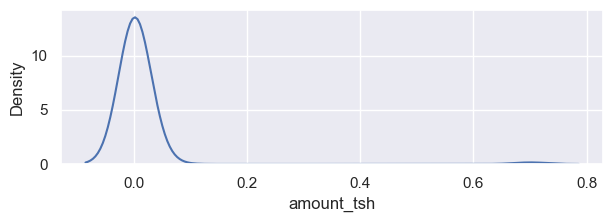

In [47]:

sns.kdeplot(data=df['amount_tsh'].value_counts(normalize=True))

| Column | Description | Cleaning needed? |
| --- | --- | --- |
| id | Pump ID | Missing ID values, max ID exceeds number of entries. Best to disregard ID and use own IDs |
| amount_tsh | Total Static Head (water available to pump) | 70% of values are 0 - column can potentially be dropped |
| date_recorded | Date row was entered | Some potential outlier values with recorded dates much earlier than others - these could likely be replaced with median value |
| funder | Who funded the well | Some missing values, some non-matching entries (ie. "Government of Tanzania" and "Government/ Community"). |
| num_private | Unclear | 98.7% of data is 0, column can be safely dropped |

# Missing values

Text(0.5, 1.0, 'Percentage of missing values by column')

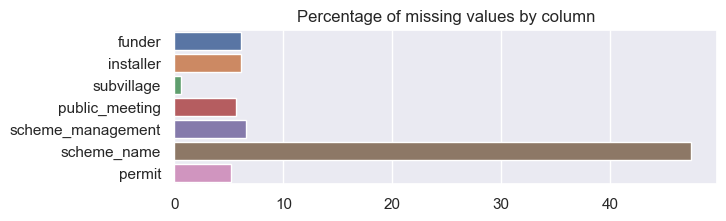

In [48]:
# %matplotlib qt

missing_counts = df.isnull().sum()
missing_proportions = missing_counts/len(df)*100

missing_proportions = missing_proportions.drop(index=missing_proportions[missing_proportions == 0].index)

sns.set(rc={'figure.figsize':(7,2)})
sns.barplot(y=missing_proportions.index, x=missing_proportions.values)
plt.title("Percentage of missing values by column")

# Zero values

Text(0.5, 1.0, 'Percentage of values equal to zero by column')

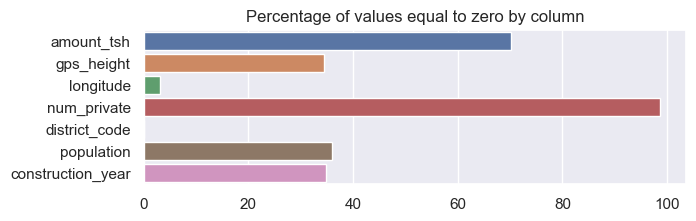

In [49]:
# Calculate the percentage of values equal to the mode for each column
percentages = {}
for column in df.select_dtypes(include=['int64', 'float64']).columns[1:-1]:
    zero_count = (df[column] == 0).sum()
    total_count = df[column].count()
    percentage = zero_count / total_count * 100
    if percentage > 0:
        percentages[column] = percentage

# Print the result
sns.set(rc={'figure.figsize':(7,2)})
sns.barplot(y=list(percentages.keys()), x=list(percentages.values()))
plt.title("Percentage of values equal to zero by column")

# Outliers

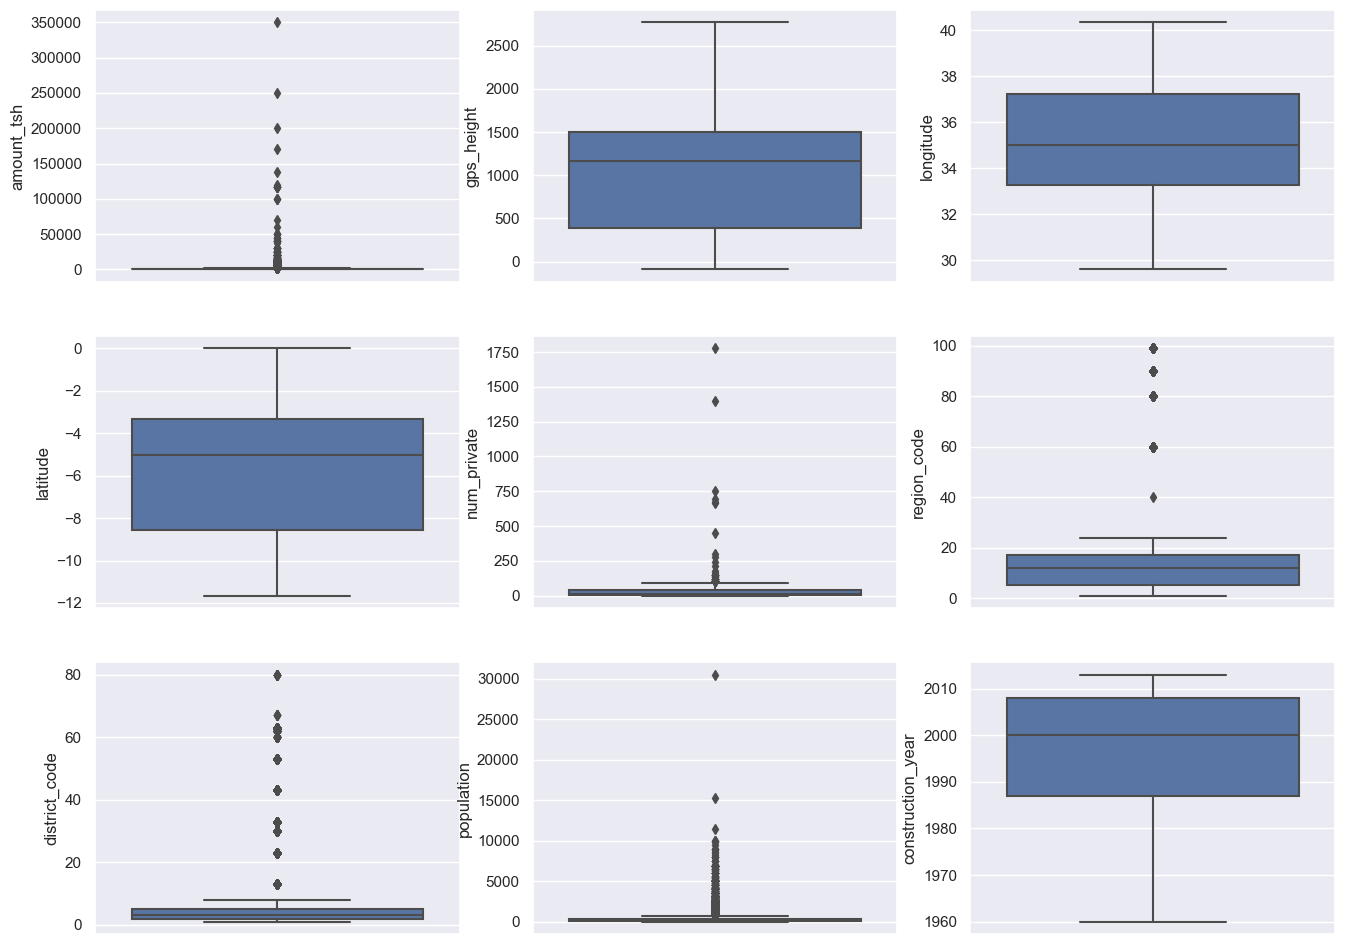

In [50]:
fig, axs = plt.subplots(3,3, figsize=(16, 12))

for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns[1:-1]):

    y = df[column]

    # print(i, column)

    if column in list(percentages.keys()):
        # print('1:',len(y))
        y = df.loc[df[column] != 0, column]
        # print('2:',len(y))
    if column in list(missing_proportions.index):
        # print('3:',len(y))
        y = df.loc[df[column].notnull(), column]
        # print('4:',len(y))

    # print(y.describe())

    # Add boxplot
    sns.boxplot(ax=axs[i//3, i%3], y=y)

plt.show()

# Distribution

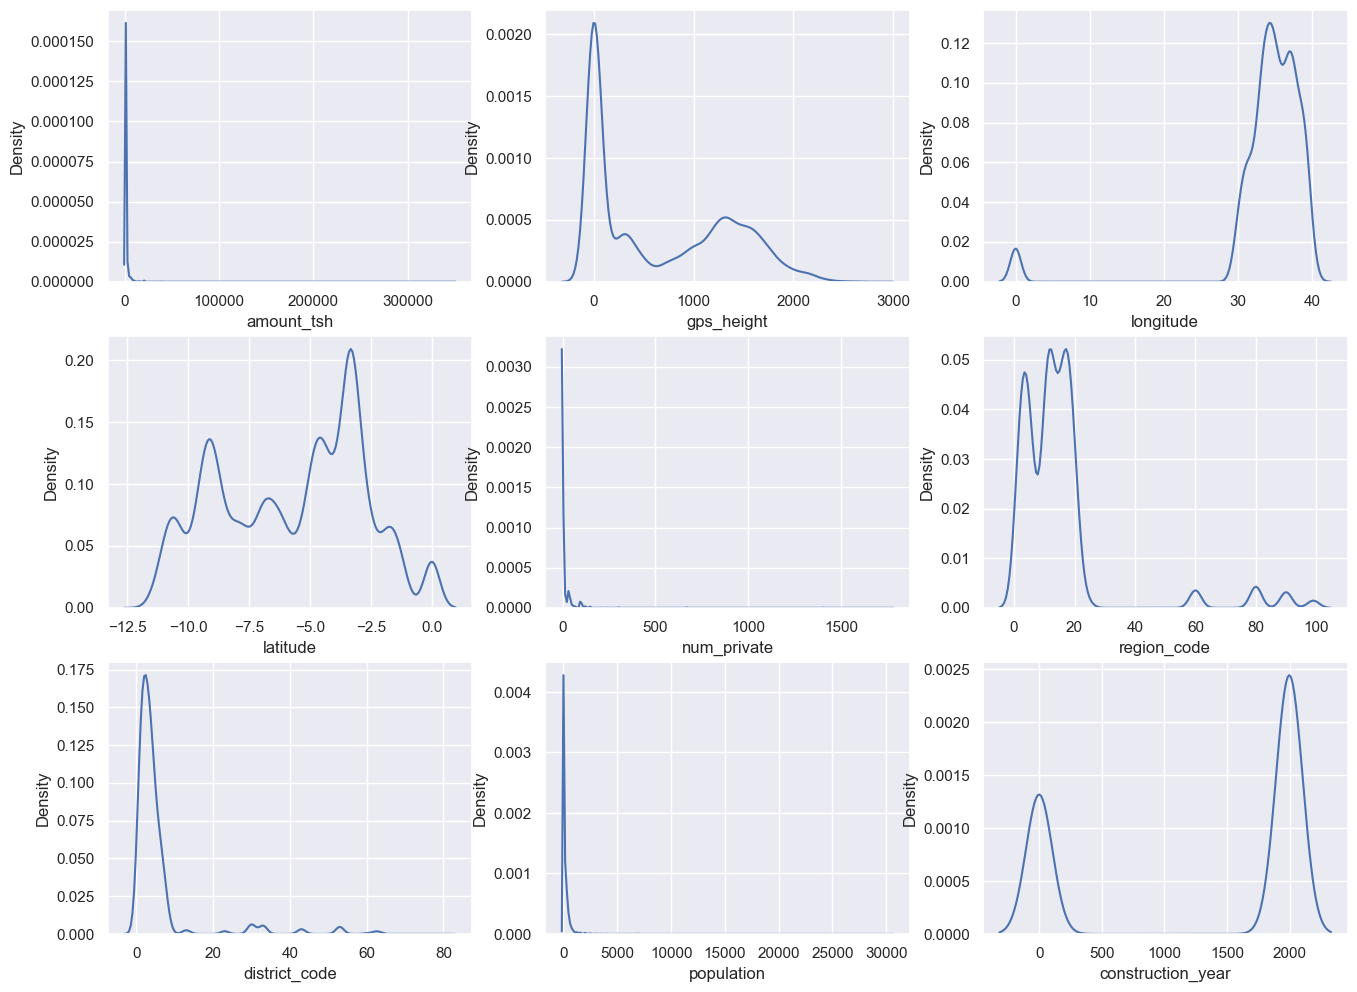

In [56]:
%matplotlib inline
fig, axs = plt.subplots(3,3, figsize=(16, 12))

for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns[1:-1]):

    x = df[column]

    # print(i, column)

    if column in list(percentages.keys()):
        # print('1:',len(y))
        y = df.loc[df[column] != 0, column]
        # print('2:',len(y))
    if column in list(missing_proportions.index):
        # print('3:',len(y))
        y = df.loc[df[column].notnull(), column]
        print('4:',len(y))

    sns.kdeplot(ax=axs[i//3, i%3], x=x)
    

basin
scheme_management
extraction_type
extraction_type_group
extraction_type_class
management
management_group
payment
payment_type
water_quality
quality_group
quantity
quantity_group
source
source_type
waterpoint_type
waterpoint_type_group


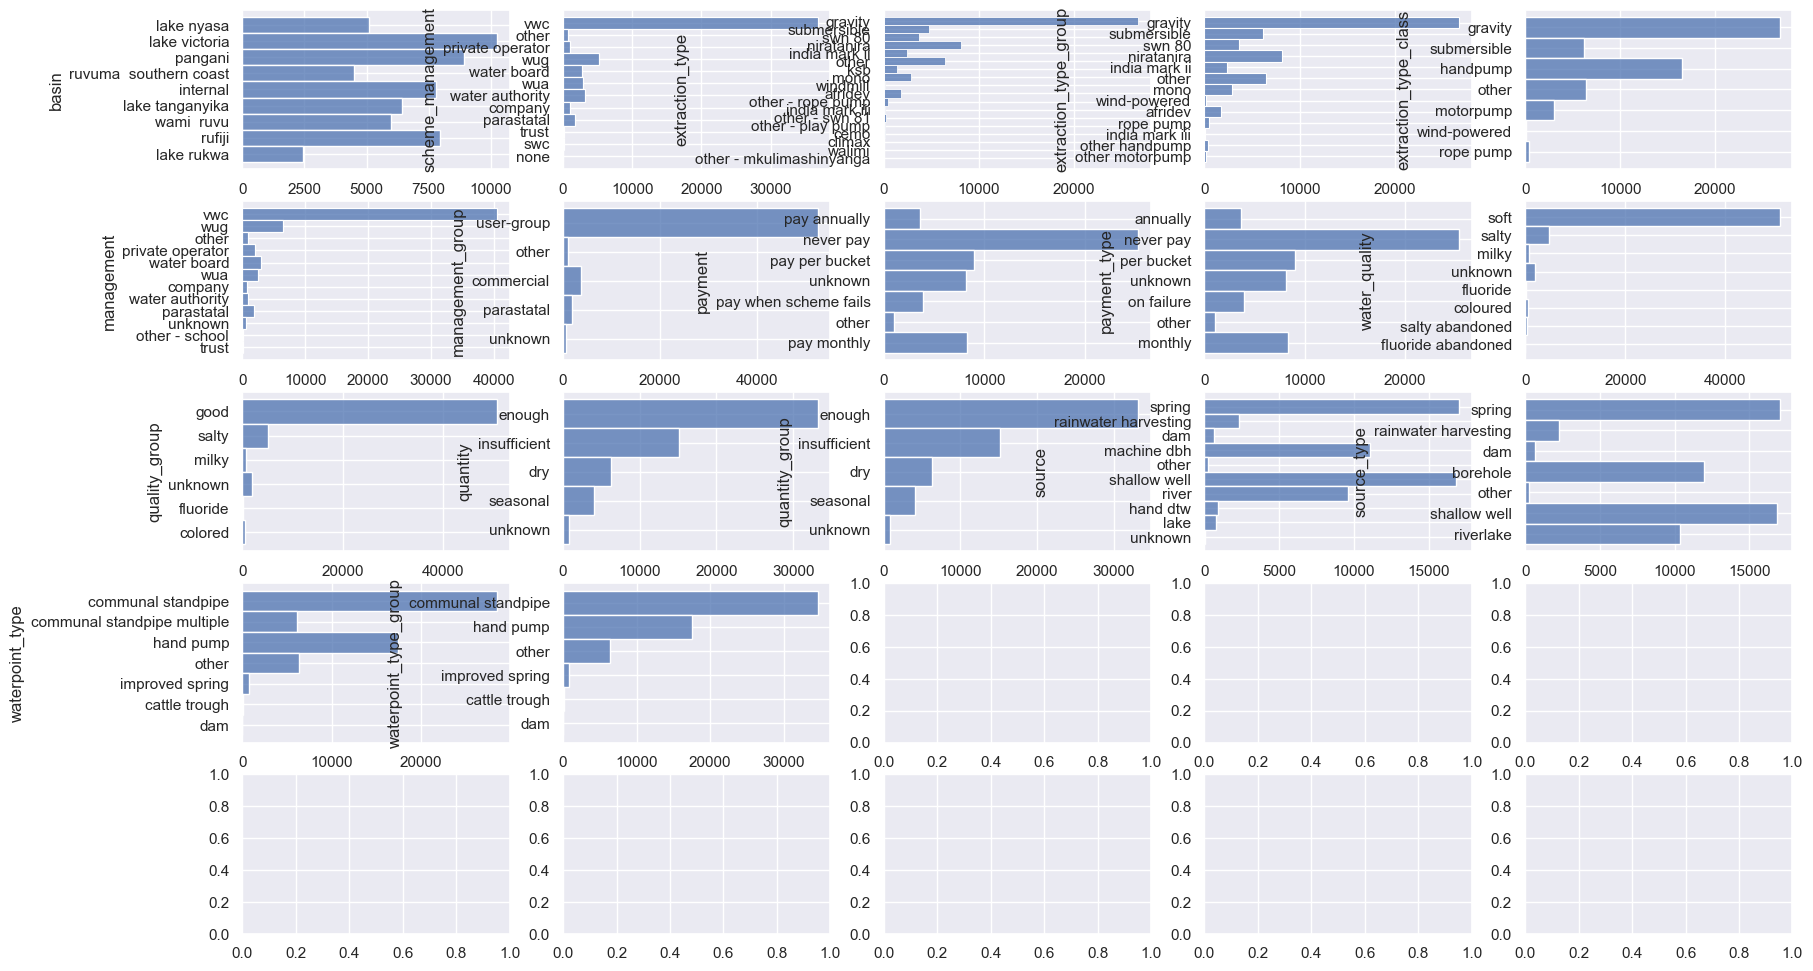

In [52]:
%matplotlib inline
import re

fig, axs = plt.subplots(5,5, figsize=(20, 12))
i=0

for column in df.select_dtypes(exclude=['int64', 'float64']).columns[:-1]:

    if df[column].unique().size < 20 and df[column].unique().size > 3:
        x = df[column]
        
        print(column)
        # filter out weird characters and change to lowercase
        x = x.apply(lambda x: re.sub(r"[^\w\s\-]*", '', x.lower()) if type(x) == str else x)
        
        sns.histplot(ax=axs[i//5, i%5], y=x)
        i += 1

    # print(i, column)

    # if column in list(percentages.keys()):
    #     # print('1:',len(y))
    #     y = df.loc[df[column] != 0, column]
    #     # print('2:',len(y))
    # if column in list(missing_proportions.index):
    #     # print('3:',len(y))
    #     y = df.loc[df[column].notnull(), column]
        # print('4:',len(y))

    

<AxesSubplot: xlabel='year', ylabel='proportion'>

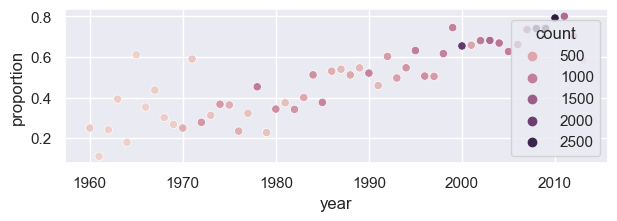

In [53]:

# Count rows with the same construction_year
construction_year_counts = pd.DataFrame(df['construction_year'].value_counts(), index=None)
construction_year_counts.columns = ['count']


# Show distribution of all classes in status_group column for each construction year
for year in construction_year_counts.index:
    construction_year_counts.loc[construction_year_counts.index == year, 'func_counts'] = len(df[(df['construction_year'] == year) & (df['status_group'] == 'functional')])
    construction_year_counts.loc[construction_year_counts.index == year, 'nonfunc_counts'] = len(df[(df['construction_year'] == year) & (df['status_group'] == 'non functional')])
    construction_year_counts.loc[construction_year_counts.index == year, 'proportion'] = construction_year_counts['func_counts']/(construction_year_counts['func_counts']+construction_year_counts['nonfunc_counts'])

# print(construction_year_counts)
# add a column of incremental index
construction_year_counts.reset_index(drop=False, inplace=True)
construction_year_counts.rename(index=str, columns={'index': 'year'}, inplace=True)

construction_year_counts.drop(index='0', inplace=True)
construction_year_counts

construction_year_counts.sort_values(by=['year'])
sns.scatterplot(construction_year_counts, x='year', y='proportion', hue='count')


Text(0.5, 0, 'Construction Year')

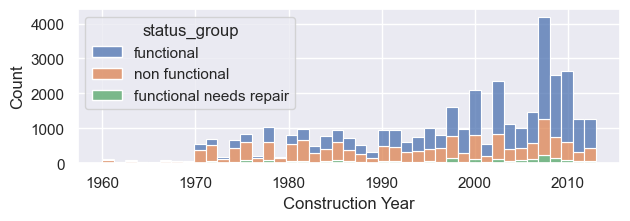

In [54]:
figure = sns.histplot(data=df[df['construction_year'] != 0], x='construction_year', hue='status_group', fill='True', multiple='stack')
plt.xlabel('Construction Year')
# figure._legend.set_title('Species')

<AxesSubplot: xlabel='construction_year', ylabel='status_group'>

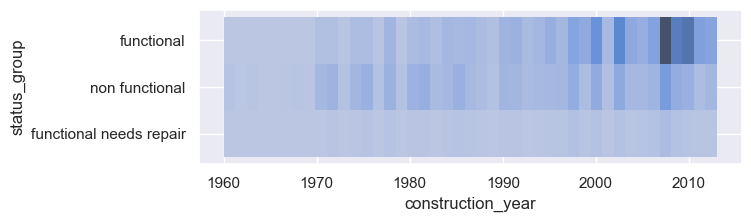

In [55]:
sns.histplot(data=df[df['construction_year'] != 0], x='construction_year', y='status_group')